Correlation Matrix:
 CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64
The attribute with the highest correlation with PRICE is: PRICE
Analytic Solution:
Intercept (b0): 22.11
Slope (b1): 0.00
SSE: 3766919.60
R^2: -204.47

Gradient Descent Solution:
Intercept (b0_gd): 22.11
Slope (b1_gd): -0.00
SSE: 3766919.60
R^2: -204.47


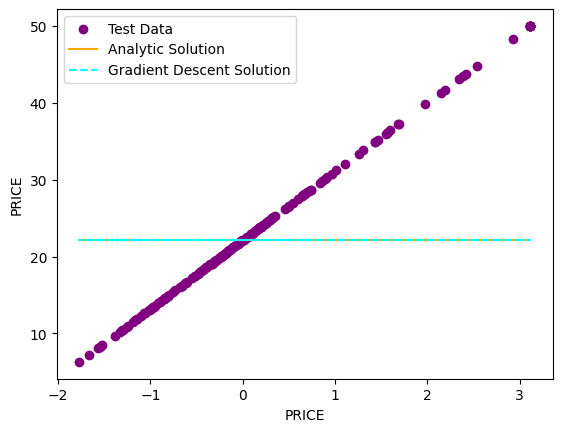

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame(data=data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['PRICE'] = target

# Calculate the correlation matrix and find the best attribute
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix['PRICE'])

best_attribute = correlation_matrix['PRICE'].idxmax(axis=0)
print(f"The attribute with the highest correlation with PRICE is: {best_attribute}")

# Split the data
X = df[[best_attribute]].values
y = df['PRICE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Analytic solution
X_train_mean = np.mean(X_train_scaled)
y_train_mean = np.mean(y_train)

numerator = np.sum((X_train_scaled - X_train_mean) * (y_train - y_train_mean))
denominator = np.sum((X_train_scaled - X_train_mean) ** 2)
b1_analytic = numerator / denominator
b0_analytic = y_train_mean - b1_analytic * X_train_mean

y_pred_analytic = b0_analytic + b1_analytic * X_test_scaled

SSE_analytic = np.sum((y_test - y_pred_analytic) ** 2)
SST = np.sum((y_test - np.mean(y_test)) ** 2)
R2_analytic = 1 - SSE_analytic / SST

print("Analytic Solution:")
print(f"Intercept (b0): {b0_analytic:.2f}")
print(f"Slope (b1): {b1_analytic:.2f}")
print(f"SSE: {SSE_analytic:.2f}")
print(f"R^2: {R2_analytic:.2f}")

# Gradient Descent solution
b0_gd = 0
b1_gd = 0
alpha = 0.001
epochs = 1000

for epoch in range(epochs):
    y_pred_gd = b0_gd + b1_gd * X_train_scaled
    error = y_pred_gd - y_train
    b0_gd -= alpha * (1/len(y_train)) * np.sum(error)
    b1_gd -= alpha * (1/len(y_train)) * np.sum(error * X_train_scaled)

y_pred_gd_test = b0_gd + b1_gd * X_test_scaled

SSE_gd = np.sum((y_test - y_pred_gd_test) ** 2)
R2_gd = 1 - SSE_gd / SST

print("\nGradient Descent Solution:")
print(f"Intercept (b0_gd): {b0_gd:.2f}")
print(f"Slope (b1_gd): {b1_gd:.2f}")
print(f"SSE: {SSE_gd:.2f}")
print(f"R^2: {R2_gd:.2f}")

# Plot the results with updated colors
plt.scatter(X_test_scaled, y_test, color='purple', label='Test Data')
plt.plot(X_test_scaled, y_pred_analytic, color='orange', label='Analytic Solution')
plt.plot(X_test_scaled, y_pred_gd_test, color='cyan', linestyle='--', label='Gradient Descent Solution')
plt.xlabel(best_attribute)
plt.ylabel('PRICE')
plt.legend()
plt.show()
